<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Machine-Learning-Scientist-with-Python/blob/main/03_Conforming_to_Statistical_Assumptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- 
<strong> 
    <h1 align='center'>Dealing with Messy Data</h1> 
</strong>

---
> This **Notebook** introduces you to the reality of messy and incomplete data. You will learn how to find where your data has missing values and explore multiple approaches on how to deal with them. You will also use string manipulation techniques to deal with unwanted characters in your dataset.


In [1]:
!git clone https://github.com/mohd-faizy/CAREER-TRACK-Machine-Learning-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Machine-Learning-Scientist-with-Python'...
remote: Enumerating objects: 275, done.
remote: Counting objects: 100% (275/275), done.
remote: Compressing objects: 100% (248/248), done.
remote: Total 604 (delta 53), reused 240 (delta 25), pack-reused 329
Receiving objects: 100% (604/604), 198.75 MiB | 26.04 MiB/s, done.
Resolving deltas: 100% (179/179), done.
Checking out files: 100% (296/296), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#sns.set_theme()

%matplotlib inline

In [3]:
os.chdir('/content/CAREER-TRACK-Machine-Learning-Scientist-with-Python/09_Feature_Engineering_for_Machine_Learning_in_Python/_dataset')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/CAREER-TRACK-Machine-Learning-Scientist-with-Python/09_Feature_Engineering_for_Machine_Learning_in_Python/_dataset


In [4]:
ls

Combined_DS_v10.csv  inaugural_speeches.csv


## **Data distributions**

A lot of algorithms **make assumptions** about how your data is distributed or how different features interact with each other. For example almost all models besides tree based models require your features to be on the same scale.

> Feature engineering can be used to manipulate your data so that it can fit the assumptions of the distribution, or at least fit it as closely as possible.

- **All model requires normal distribution**

<p align='center'>
    <a href='#'><img src='https://cdn-images-1.medium.com/max/1600/1*IZ2II2HYKeoMrdLU5jW6Dw.png' height=300 width=600><a>
</p>

- Almost every model besides tree based models assume that your data is normally distributed. Normal distributions follow a bell shape like shown here, the main characteristics of a normal distribution is that:
    - __68%__ of the data lies within 1 standard deviation of the mean
    - __95%__ percent lies within 2 standard deviations from the mean
    - and __99.7%__ fall within 3 standard deviations from the mean


- **InterQuatile Range (IQR)**

<p align='center'>
    <a href='#'><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/550px-Boxplot_vs_PDF.svg.png'><a>
</p>

While histograms can be useful to show the high level distribution of the data, it does not show details such as where the middle chunk of your data sits in an easily readable fashion.

For this you can use the box plot. The box plot shows the distribution of the data by calculating where the middle 50% of the data sits, this is also known as the Inter quartile range or IQR (it sits between the 1st and 3rd quartile) and marking it with the box.

The __whiskers__ extend to the minimum of 1.5 times the IQR from the edge of the box or the maximum range of the data. Any points outside this are marked as __outliers__. This can be useful to also see if there are points in your data set that may be unwanted outliers.


### ***1. What does your data look like?***
Up until now you have focused on creating new features and dealing with issues in your data. Feature engineering can also be used to make the most out of the data that you already have and use it more effectively when creating machine learning models.
Many algorithms may assume that your data is normally distributed, or at least that all your columns are on the same scale. This will often not be the case, e.g. one feature may be measured in thousands of dollars while another would be number of years. In this exercise, you will create plots to examine the distributions of some numeric columns in the `so_survey_df` DataFrame, stored in `so_numeric_df`.

In [5]:
so_survey_df = pd.read_csv('Combined_DS_v10.csv')
so_survey_df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [6]:
so_numeric_df = so_survey_df[['ConvertedSalary', 'Age', 'Years Experience']]

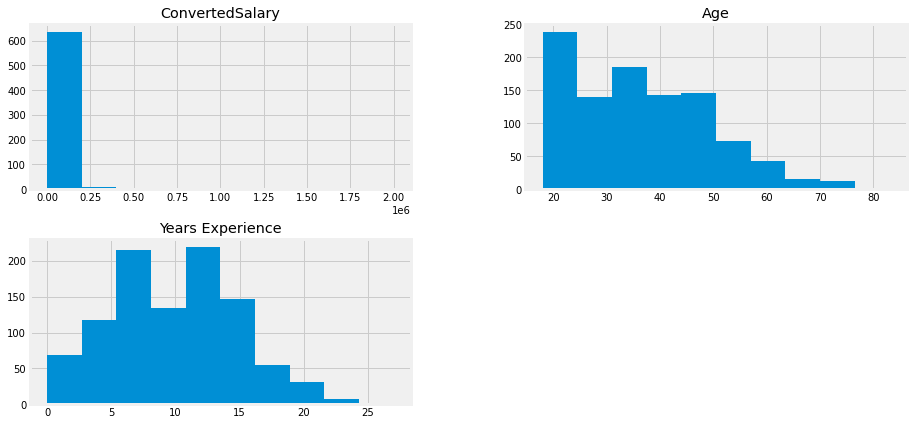

In [7]:
# Create a histogram
so_numeric_df.hist(figsize=(14,7))
plt.show()

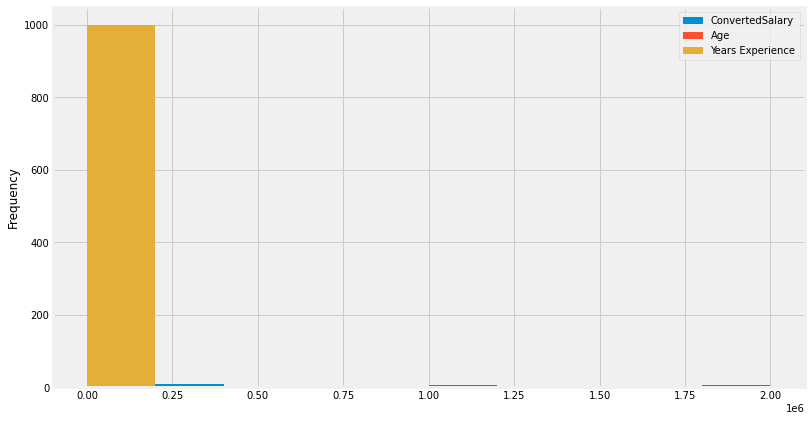

In [8]:
# Create a histogram
so_numeric_df.plot(kind='hist', figsize=(12,7))
plt.show()

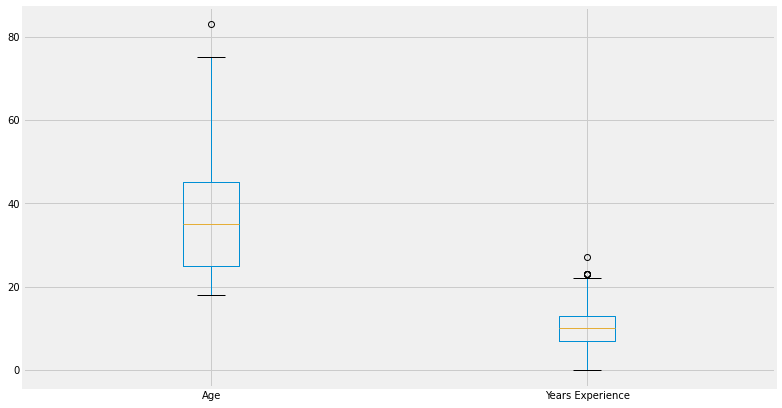

In [9]:
# Create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot(figsize=(12,7))

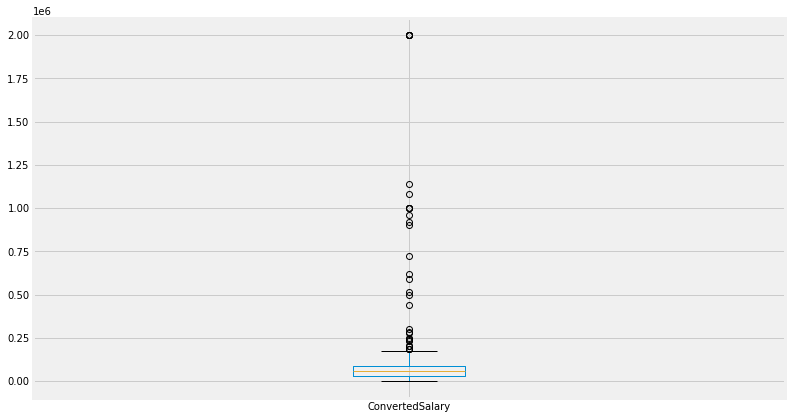

In [10]:
so_numeric_df[['ConvertedSalary']].boxplot(figsize=(12,7))

### ***2. What does your data look like?***
In the previous exercise you looked at the distribution of individual columns. While this is a good start, a more detailed view of how different features interact with each other may be useful as this can impact your decision on what to transform and how.

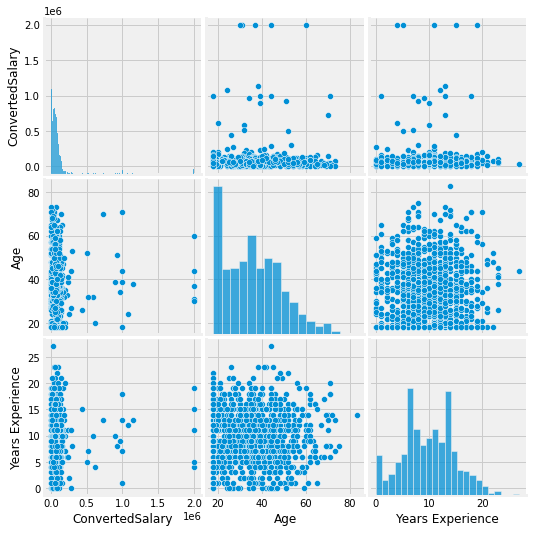

In [11]:
# Plot pairwise relationships
sns.pairplot(so_numeric_df)
plt.show()

In [12]:
# Print summary statistics
so_numeric_df.describe()

,ConvertedSalary,Age,Years Experience
count,6.650000e+02,999.000000,999.000000
mean,9.256517e+04,36.003003,9.961962
std,2.091344e+05,13.255127,4.878129
min,0.000000e+00,18.000000,0.000000
25%,2.755000e+04,25.000000,7.000000
50%,5.556200e+04,35.000000,10.000000
75%,8.823800e+04,45.000000,13.000000
max,2.000000e+06,83.000000,27.000000


## Scaling and transformations

### ***1. Normalization***

Most machine learning algorithms require your data to be on the same scale for them to be effective,

> In Normalization you linearly scale the entire column between 0 and 1, with 0 corresponding with the lowest value in the column, and 1 with the largest.

*When using scikit-learn (the most commonly used machine learning library in Python) you can use a `MinMaxScaler` to apply normalization. (It is called this as it scales your values between a minimum and maximum value.)*

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# Compare the original and transformed column
so_numeric_df[['Age_MM', 'Age']].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Age_MM,Age
0,0.046154,21
1,0.307692,38
2,0.415385,45
3,0.430769,46
4,0.323077,39


In [14]:
so_numeric_df[['Age_MM', 'Age']].describe()

,Age_MM,Age
count,999.000000,999.000000
mean,0.276969,36.003003
std,0.203925,13.255127
min,0.000000,18.000000
25%,0.107692,25.000000
50%,0.261538,35.000000
75%,0.415385,45.000000
max,1.000000,83.000000


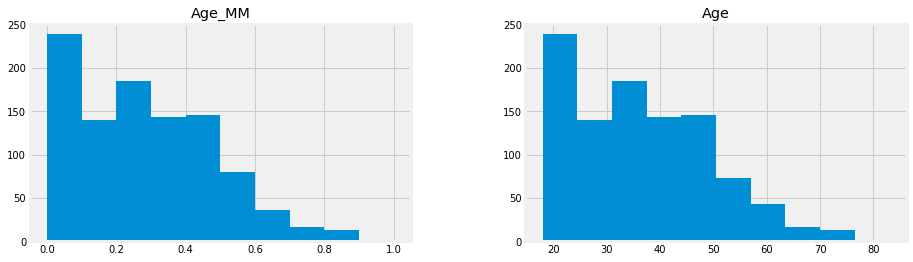

In [15]:
so_numeric_df[['Age_MM', 'Age']].hist(figsize=(14,4))
plt.show()

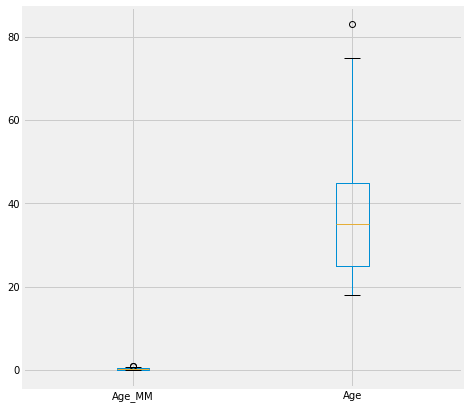

In [16]:
so_numeric_df[['Age_MM', 'Age']].boxplot(figsize=(7,7))
plt.show()

> **Note:** That as this scaler assumes the max value it is created with is your upper bound, new data from outside this range may create unforeseen results.

### ***2. Standardization***

While **Normalization** can be useful for **scaling** a column between **two data points**, ***it is hard to compare two scaled columns if even one of them is overly affected by outliers.*** One commonly used solution to this is called **Standardization**. 

As opposed to finding an outer boundary and squeezing everything within it, **Standardization** instead $\color{blue}{\textbf{finds the mean of your data and centers your distribution around it}}$.

Calculating the number of **Standard Deviations** away from the mean each point is. These values (the number of standard deviations) are then used as your new values. This centers the data around $0$ but technically has no limit to the **maximum** and **minimum values**.



In [17]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

# Compare the original and transformed column
so_numeric_df[['Age_SS', 'Age']].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Age_SS,Age
0,-1.132431,21
1,0.150734,38
2,0.679096,45
3,0.754576,46
4,0.226214,39


In [18]:
so_numeric_df[['Age_SS', 'Age']].describe()

,Age_SS,Age
count,9.990000e+02,999.000000
mean,9.935329e-17,36.003003
std,1.000501e+00,13.255127
min,-1.358872e+00,18.000000
25%,-8.305099e-01,25.000000
50%,-7.570696e-02,35.000000
75%,6.790960e-01,45.000000
max,3.547347e+00,83.000000


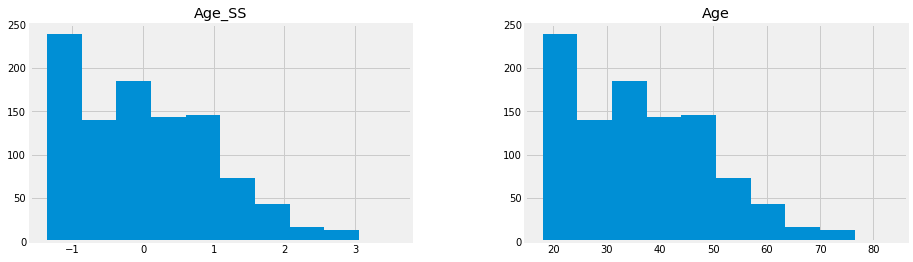

In [19]:
so_numeric_df[['Age_SS', 'Age']].hist(figsize=(14,4))
plt.show()

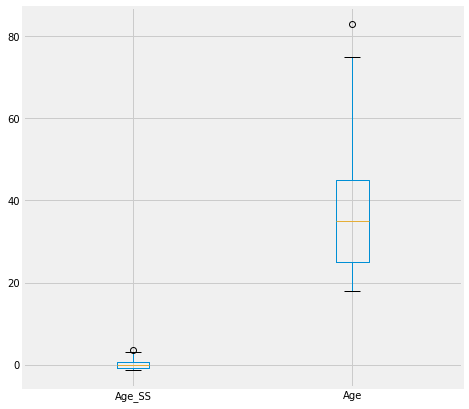

In [20]:
so_numeric_df[['Age_SS', 'Age']].boxplot(figsize=(7,7))
plt.show()

### ***3. Log transformation***

Both **Normalization** and min-max scaling are types of scalers, in other words the __Data remained in the same shape but was squashed or scaled__.

> A **log transformation** on the other hand can be used to make $\color{blue}{\textbf{highly skewed distributions less skewed}}$.

>In the previous exercises we scaled the data linearly, ***which will not affect the data's shape***. This works great if your data is normally distributed (or closely normally distributed), an assumption that a lot of machine learning models make.

Sometimes you will work with data that closely conforms to normality, e.g the height or weight of a population. On the other hand, many variables in the real world do not follow this pattern e.g, wages or age of a population.

In this exercise you will use a log transform on the `ConvertedSalary` column in the `so_numeric_df` DataFrame as it has a large amount of its data centered around the lower values, but contains very high values also. These distributions are said to have a long right tail.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


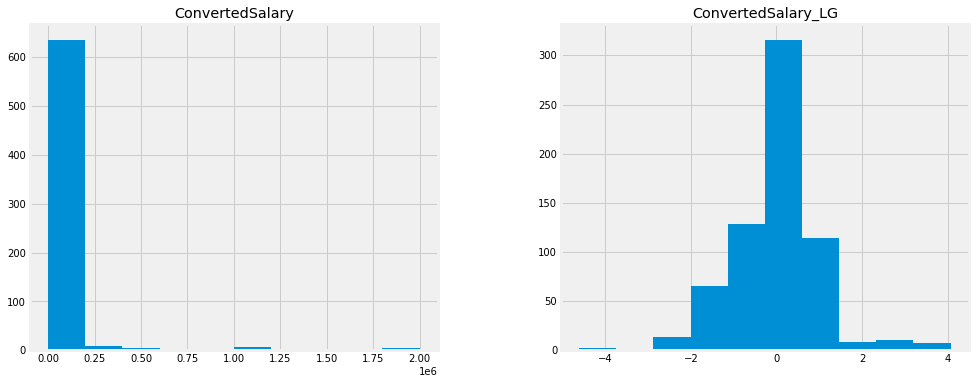

In [21]:
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist(figsize=(15,6))
plt.show()

> Did you notice the change in the shape of the distribution? `ConvertedSalary_LG` column **looks much more normal** than the original ConvertedSalary column.

>In the first plot Data is highly skewed towards left after applying `PowerTransformer` the data distributions has become less skewed .

## **Removing outliers**

> __NOTE:__ Even after performing these transformations, your data is still very skewed. **This can often be caused by outliers existing in your data**.

***What are outliers?***

Outliers are data points that exist far away from the majority of your data. This can happen due to several reasons, such as
> Incorrect data recording to genuine rare occurrences

Either way you will often want to remove these values **as they can negatively impact our models**.


### ***1. Percentage based outlier removal***
One way to ensure a small portion of data is not having an overly adverse effect is by removing a certain percentage of the largest and/or smallest values in the column. This can be achieved by finding the relevant quantile and trimming the data using it with a mask. This approach is particularly useful if you are concerned that the highest values in your dataset should be avoided. When using this approach, you must remember that even if there are no outliers, this will still remove the same top N percentage from the dataset.



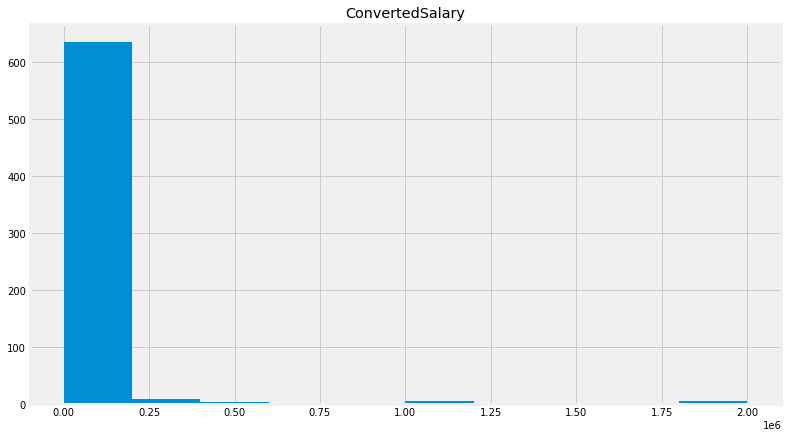

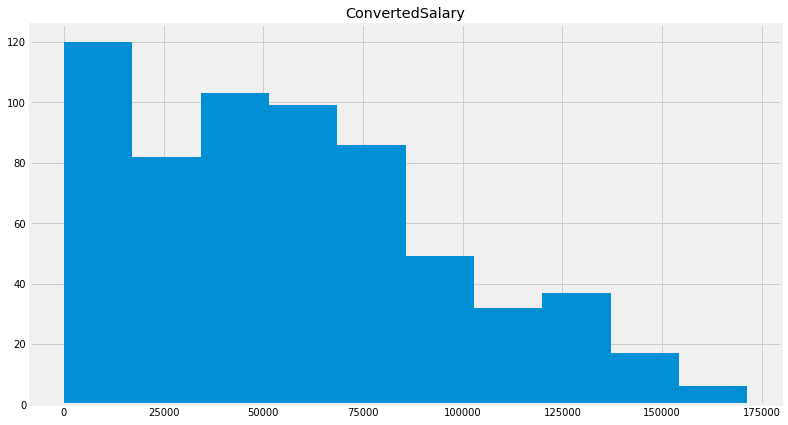

In [22]:
# Find the 95th quantile - i.e removing the top 5%
q_cutoff = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outlier
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < q_cutoff]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist(figsize=(12,7))

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist(figsize=(12,7))
plt.show()

> When using this approach, Remember that even if there are no real outliers, you will still be removing the top $5\%$ of values from the dataset.

### ***2 Statistical*** outlier removal

 For example you may want to eliminate all data greater than $3$ standard deviations from the mean as you expect those data points to be outliers. This approach has the benefit of only removing genuinely extreme values, for example if only one value was an outlier, only that value would be effected.

While removing the top $N\%$ of your data is useful for ensuring that very spurious points are removed, it does have the disadvantage of always removing the same proportion of points, even if the data is correct. A commonly used alternative approach is to remove data that sits further than three standard deviations from the mean. You can implement this by first calculating the mean and standard deviation of the relevant column to find upper and lower bounds, and applying these bounds as a mask to the DataFrame. This method ensures that only data that is genuinely different from the rest is removed, and will remove fewer points if the data is close together.



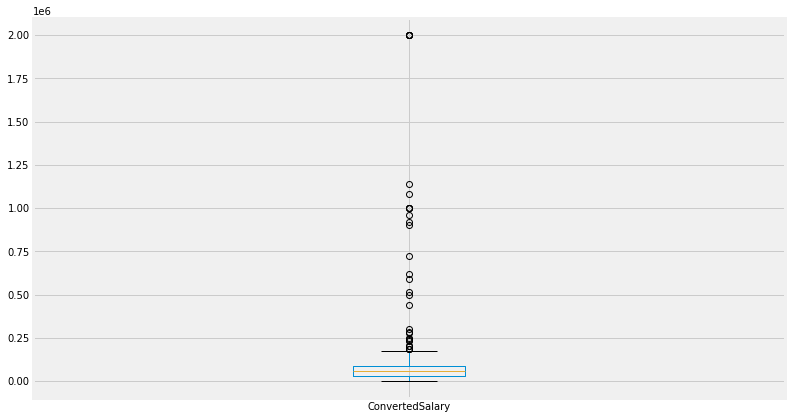

In [23]:
so_numeric_df[['ConvertedSalary']].boxplot(figsize=(12,7))
plt.show()

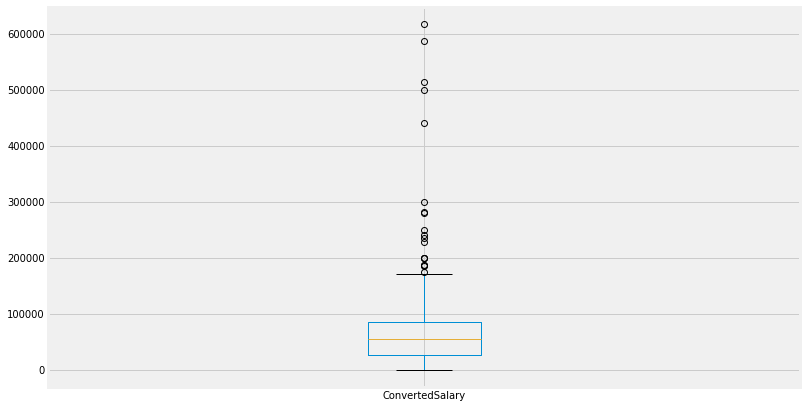

In [24]:
# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outlier
trimmed_df = so_numeric_df[
                           (so_numeric_df['ConvertedSalary'] < upper) &
                           (so_numeric_df['ConvertedSalary'] > lower)
                           ]

# Trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot(figsize=(12,7))
plt.show()

## **Scaling and transforming new data**

**Reuse training scalers**

How you go about doing this depends on what transformations you make to the dataset before you fit the model. For example, if you applied the StandardScaler() to your data before fitting the model, you need to make sure you transform the test data using the same scalar before making predictions.

> $\color{red}{\textbf{Note:}}$ 
- $\color{blue}{\textbf{That the scaler is fitted only on the training data.}}$
- $\color{blue}{\textbf{That is, you fit and transform the training data, but only transform the test data.}}$

Similarly, if you intend to remove outliers from your __test set__, you should use the **thresholds** found on your train set to do so. If you were to use the mean and standard deviation of the test set, it could negatively impact your predictions.


>$\color{red}{\textbf{Note:}}$ $\color{blue}{\textbf{It is only in very rare cases that you would want to remove outliers from your test set.}}$

**Why only use training data?**

***So why did we not refit the scaler on the test data or use thresholds from the test data?*** To avoid **Data leakage**.
> In real life, you won't have access to the __Test Data__, that is, when you have deployed your model in production, you won't have access to future data, so you can't rely on it to make predictions and assess model performance.

**Avoid data leakage!**

>Thus, you should always make sure you ***calibrate your preprocessing steps*** only on your $\color{green}{\textbf{Training data}}$ or else you will $\color{green}{\textbf{overestimate the accuracy of your models}}$

### *Train and testing transformations* ($I$)
So far you have created scalers based on a column, and then applied the scaler to the same data that it was trained on. When creating machine learning models you will generally build your models on historic data (train set) and apply your model to new unseen data (test set). In these cases you will need to ensure that the same scaling is being applied to both the training and test data.
To do this in practice you train the scaler on the train set, and keep the trained scaler to apply it to the test set. You should never retrain a scaler on the test set.

In [25]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('Combined_DS_v10.csv')
so_numeric_df = df[['ConvertedSalary', 'Age', 'Years Experience']]

so_train_numeric, so_test_numeric = train_test_split(so_numeric_df, test_size=0.3)

In [26]:
from sklearn.preprocessing import StandardScaler

# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']])

# Transform the test data using the fitted scaler
so_test_numeric['Age_SS'] = SS_scaler.transform(so_test_numeric[['Age']])

so_test_numeric[['Age', 'Age_SS']].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Age,Age_SS
60,18,-1.386742
894,18,-1.386742
586,26,-0.784999
410,18,-1.386742
647,44,0.568922


### *Train and testing transformations* ($II$)
Similar to applying the same scaler to both your training and test sets, if you have removed outliers from the train set, you probably want to do the same on the test set as well. Once again you should ensure that you use the thresholds calculated only from the train set to remove outliers from the test set.

In [27]:
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) &
                             (so_test_numeric['ConvertedSalary'] > train_lower)]

trimmed_df.head()

,ConvertedSalary,Age,Years Experience,Age_SS
60,52627.0,18,6,-1.386742
894,783.0,18,4,-1.386742
410,80521.0,18,16,-1.386742
647,42348.0,44,10,0.568922
274,9840.0,48,4,0.869794


## __Connect with Me__ 
--- 
[<img align="left" alt="codeSTACKr | Twitter" width="40px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/twitter.svg" />][twitter] 
[<img align="left" alt="codeSTACKr | LinkedIn" width="40px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/linkedin.svg" />][linkedin] 
[<img align="left" alt="codeSTACKr.com" width="40px" src="https://raw.githubusercontent.com/iconic/open-iconic/master/svg/globe.svg" />][StackExchange AI] 
[twitter]: https://twitter.com/F4izy 
--- 
[linkedin]: https://www.linkedin.com/in/mohd-faizy/ 
--- 
[StackExchange AI]: https://mohd-faizy.github.io
--- 
--- 
--- 
---